In [1]:
#NES in 1D - here our function is basically -(x-0.5)^2 - (x - 0.1)^2 - (x + 0.3)^2
import numpy as np
np.random.seed(0)

def f(w):
  center = np.array([0.5, 0.1, -0.3])
  return -np.sum(np.square(center - w))

def nes(npop, n_iter, sigma, alpha, f, w0):
  w = w0
  v = [w]
  for i in range(n_iter):
    eps_sum = 0
    for j in range(npop):
      eps = np.random.normal(0, 1)
      eps_sum += f(w + eps * sigma) * eps
    eps_sum = eps_sum * alpha / npop / sigma
    w += eps_sum
    v.append(w)
  return w, v

In [14]:
w, v = nes(50, 100000, 1, 0.0001, f, 1)
print(w)

0.110454826294


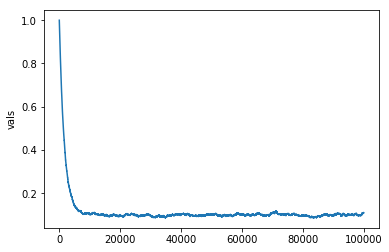

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(v)
plt.ylabel('vals')
plt.show()

# Plot the values that we get - we can see that function converges to 0.1 - which is the minimum of f (it's easy
# to verify this by taking a derivative)

In [43]:
#NES in 3D - here w is a vector
import numpy as np
np.random.seed(0)

def nes_3(npop, n_iter, sigma, alpha, f, w0):
  w = w0
  v = [w]
  for i in range(n_iter):
    eps_sum = 0
    for j in range(npop):
      # Generate a random vector
      eps = np.random.normal(0, 1, size=3)
      eps_sum += f(w + eps * sigma) * eps
    eps_sum = eps_sum * alpha / npop / sigma
    w += eps_sum
    v.append(w)
  return w, v

In [46]:
# As you can see, we converged to (0.5, 0.1, -0.3), which is indeed the minimum
w, v = nes_3(40, 10000, 1, 0.001, f, [4,4,4])
print(w)

[ 0.50383492  0.10401875 -0.30436587]


In [35]:
#CEM in 1D

def cem(n_iter, mu, sigma, batch_size, elite_frac):
    mus = [mu]
    for _ in range(n_iter):
        if sigma < 1e-12:
            break
        vals = []
        for j in range(batch_size):
            rv = np.random.normal(mu, sigma)
            vals.append((f(rv), rv))
        vals.sort()
        vals = vals[-elite_frac:]
        mu = np.mean(np.array(vals)[:, 1])
        mus.append(mu)
        sigma = np.std(np.array(vals)[:, 1])
    return mu, mus

In [36]:
mu, mus = cem(100, 1, 1, 100, 10)
print(mu)

0.100000002224


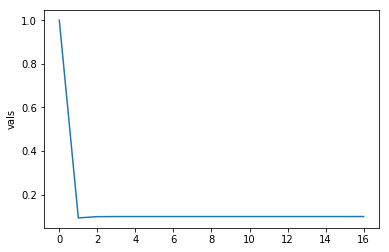

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(mus)
plt.ylabel('vals')
plt.show()

# Note how quickly we converged!

In [75]:
#CEM in 3D (w is a vector)

def cem_multi(n_iter, mu, sigma, batch_size, elite_frac):
    mus = [mu]
    for _ in range(n_iter):
        if sigma < 1e-12:
            break
        vals = []
        for j in range(batch_size):
            rv = np.random.normal(mu, sigma, 3)
            vals.append((f(rv), rv))
        vals.sort()
        vals = vals[-elite_frac:]
        filt_vals = []
        for z in range(len(vals)):
            filt_vals.append(vals[z][1])
        mu = np.mean(np.array(filt_vals), axis=0)
        mus.append(mu)
        sigma = np.std(np.array(filt_vals))
        
    return mu, mus

In [81]:
# We converge to (0.5, 0.1, -0.3) as expected
mu, mus = cem_multi(100, [2,2,2], 1, 500, 25)
print(mu)

[ 0.5061659   0.11507896 -0.3008684 ]
